In [3]:
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns

In [4]:
df=pd.read_csv('housing.csv')
df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<AxesSubplot: xlabel='year', ylabel='price'>

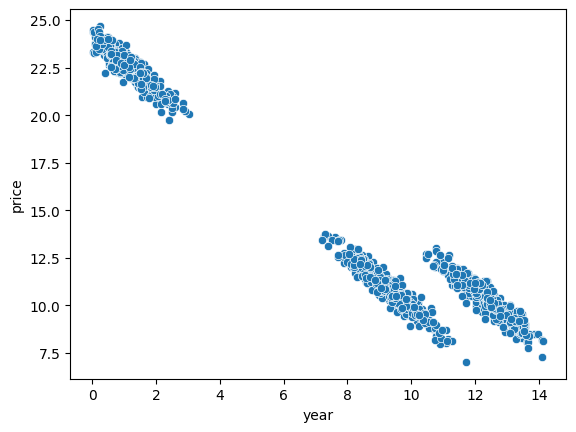

In [5]:
# попробуем кластеризовать покемонов по их силе атаки и защиты
# для этого сохраним в матрицу X 2 интересующих признака: атаку и защиту
X = df[['year', 'price']]

#визуализируем
sns.scatterplot(x=df.year, y=df.price)

<AxesSubplot: xlabel='year', ylabel='price'>

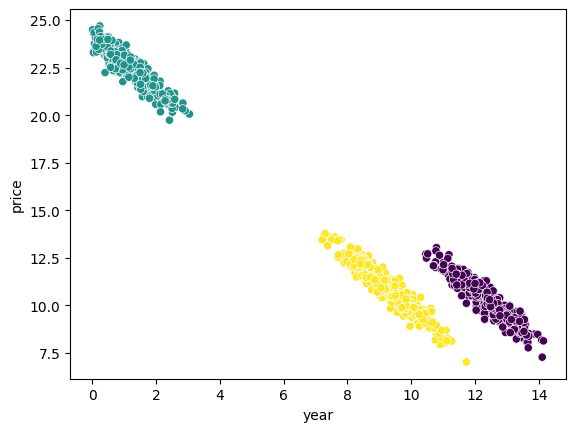

In [11]:
import numpy as np
from sklearn.mixture import GaussianMixture
gm_clustering=GaussianMixture(n_components=3, random_state=42)
gm_clustering.fit(X)
gm_prediction=gm_clustering.predict(X)
# сохраним предсказания в датафрейм
df['Clusters'] = gm_prediction
sns.scatterplot(gm_prediction, x=df.year, y=df.price, c=df.Clusters)


c:\Users\админ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='year', ylabel='price'>

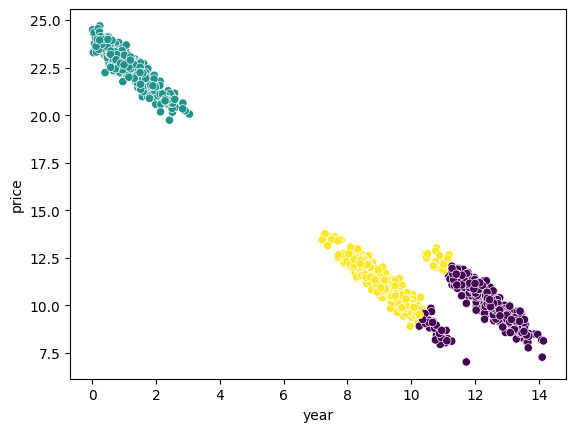

In [12]:
from sklearn.cluster import KMeans
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++',  random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.year, y=df.price, c=predictions)

<AxesSubplot: xlabel='year', ylabel='price'>

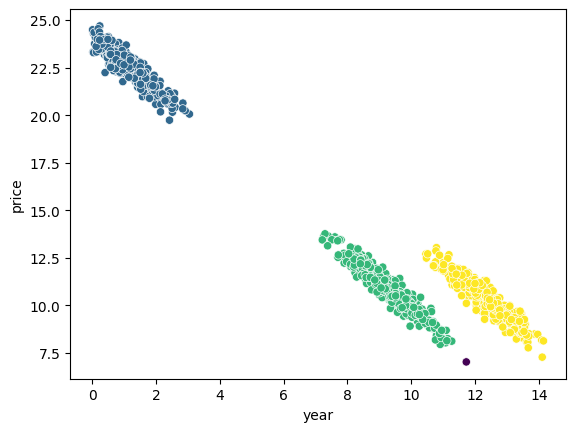

In [19]:
from sklearn.cluster import DBSCAN
clustering=DBSCAN(eps = 0.7, min_samples = 6).fit(df[['year','price']])
sns.scatterplot(x=df.year, y=df.price, c=clustering.labels_)